# Aula 1 - Dados e visualizações

**Sites para encontrar dataset**
 - Kaggle
 - Google dataset search

**ANALISANDO AS NOTAS EM GERAL**

In [1]:
#importando bibliotecas
import pandas as pd
import seaborn as sns 

In [2]:
#lendo arquivo csv
notas = pd.read_csv("dados/ratings.csv")
#mostra as 5 primeiras linhas
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
#mostra número de linhas e colunas
notas.shape

(100836, 4)

In [84]:
#troca o nome das colunas
notas.columns = ['usuarioId','filmeId','nota','momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [13]:
#verificando o conteudo da coluna nota
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [15]:
#verifando os valores unicos presentes na coluna
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

- **Explorando de maneira numérica**

In [16]:
#contado quantas vezes cada nota apareceu
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

- **Explorando por meio de medidas descritivas**

In [23]:
#média de todas as notas
print("Média",notas['nota'].mean())
#mediana das notas
print("Mediana",notas['nota'].median())

Média 3.501556983616962
Mediana 3.5


In [24]:
#Descrevendo os dados
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

- **Explorando de maneira visual**

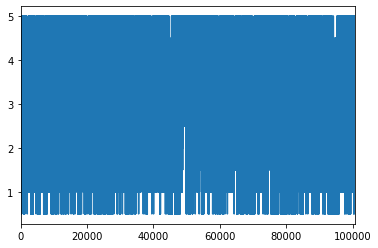

In [18]:
notas.nota.plot() #dessa forma posta nota x indice

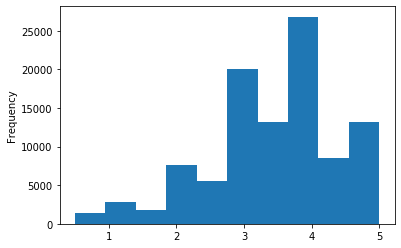

In [19]:
#histograma  - posso saber a frequência de cada nota
notas.nota.plot(kind='hist')

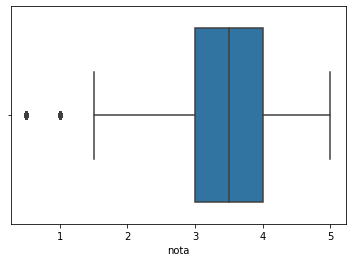

In [28]:
sns.boxplot(notas.nota)

- A mediana está no 3.5. 
- Metada das pessoas estão dando notas entre 3 e 4
- 25% entre 4 e 5
- 25% entre 0.5 e 3

# Aula 2 - Análise exploratória

In [3]:
#importando novo csv
filmes = pd.read_csv("dados/movies.csv")
filmes.head()
filmes.columns = ['filmeId','titulo','generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


**ANALISANDO ALGUMAS NOTAS ESPECIFICAS POR FILME**

In [19]:
#média das notas para o filme 1
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [21]:
#média das notas para o filme 2
notas.query("filmeId==2").nota.mean()

3.4318181818181817

In [29]:
#Agrupando o dataframe notas por filme
media_filme = notas.groupby("filmeId").mean()['nota']
media_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

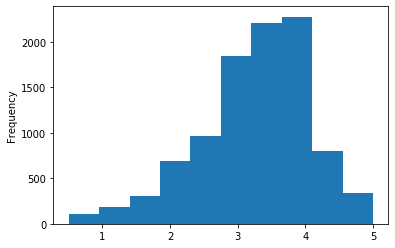

In [32]:
#histograma medias por filme (pandas)
media_filme.plot(kind='hist')

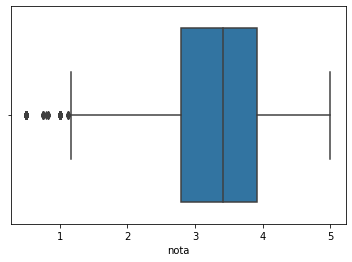

In [34]:
#boxplot médias por filme (seaborn)
sns.boxplot(media_filme)

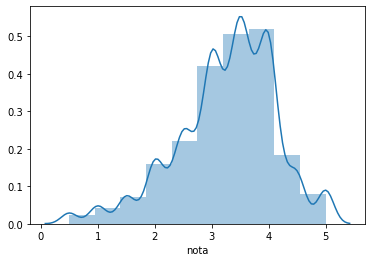

In [37]:
#histograma (seaborn)
sns.distplot(media_filme, bins = 10) 

- bins representa o número de caixinhas, a resolucao do grafico. O seaborn já apresenta o valor automaticamente. 
- O gráfico de linha sobreposto representa a distribuição aproximada dos dados.

Text(0.5, 1.0, 'Histograma das médias por filme')

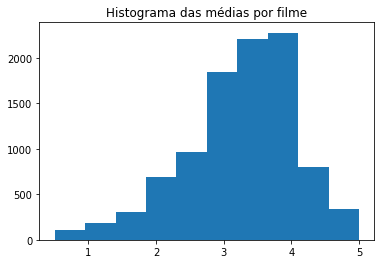

In [40]:
#importando outra biblioteca para visualização
import matplotlib.pyplot as plt

plt.hist(media_filme)
plt.title("Histograma das médias por filme")

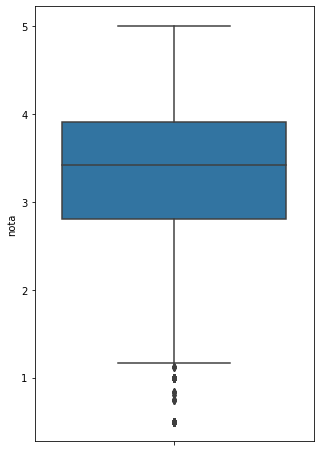

In [42]:
#mesclando pyplot com seaborn
plt.figure(figsize=(5,8))
sns.boxplot(y=media_filme)

- É possível mesclar comandos do matplotlib para configurar gráficos plotados pelo seaborn.


# Aula 3 - Variáveis

In [4]:
tmdb = pd.read_csv("dados/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [44]:
tmdb.original_language.unique() #variaveis categóricas nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

- ['pt','en','fr'] = variável categórica nominal
- ['primeiro_grau','segundo_grau','terceiro_grau'] = variavel categórica ordinal
- Valor em moeda (orçamento) = variavel quantitativa continua
- Quantidade de votos = variavel quantitativa

**Afinal, o que são variáveis categóricas nominais e ordinais?**

As variáveis categóricas são aquelas que não possuem valores quantitativos, mas, ao contrário, são definidas por várias categorias, ou seja, representam uma classificação dos indivíduos. Podem ser nominais ou ordinais.

Quando estamos trabalhando com categorias ordinais, existe uma ordenação entre as categorias. Por exemplo: escolaridade (primeiro, segundo e terceiro graus), estágios de uma doença (inicial, intermediário, terminal), mês de observação (janeiro, fevereiro, ..., dezembro), etc.

# Aula 4 - Data visualization


In [46]:
tmdb['original_language'].value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
he       3
th       3
ta       2
ar       2
cs       2
id       2
ro       2
hu       1
xx       1
tr       1
el       1
pl       1
nb       1
is       1
af       1
ps       1
te       1
sl       1
no       1
vi       1
ky       1
Name: original_language, dtype: int64

In [47]:
tmdb['original_language'].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ko', 'ru', 'pt',
       'da', 'sv', 'nl', 'fa', 'he', 'th', 'ta', 'ar', 'cs', 'id', 'ro', 'hu',
       'xx', 'tr', 'el', 'pl', 'nb', 'is', 'af', 'ps', 'te', 'sl', 'no', 'vi',
       'ky'],
      dtype='object')

In [49]:
tmdb['original_language'].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1], dtype=int64)

In [53]:
#Transformando série para data frame
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language","total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


**Visualizar e comparar categorias**


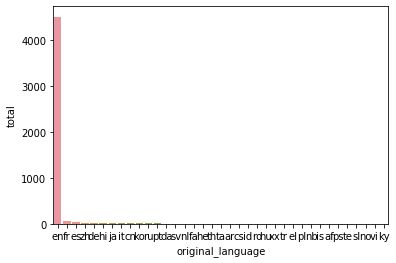

In [54]:
#Gráfico de barras
sns.barplot(x = "original_language", y = "total", data= contagem_de_lingua)

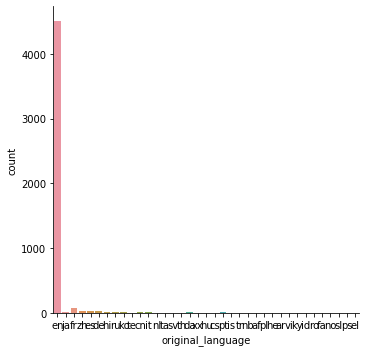

In [55]:
#Platando a contagem de filmes por categoria de lingua - UMA LINHA DE CÓDIGO
sns.catplot(x="original_language", kind="count", data=tmdb)

- O gráfico de barras é interessante, entretanto para essa quantidade de dados e para esse caso específico ontem você uma categória com um valor muito discrepante em relação aos demais, ele não é util para uma boa visualização.

In [56]:
print(sns.__version__)

0.9.0


([<matplotlib.patches.Wedge at 0x166c8fe29c8>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text(

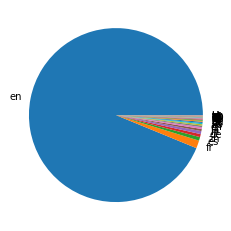

In [57]:
#gráfico de pizza
plt.pie(contagem_de_lingua['total'], labels = contagem_de_lingua['original_language'])

- Não é um gráfico recomendado

A sugestão é simplesmente mostra que o ingles é predomintante em relação as demais linguas. Para isso sugere-se agrupar as demais linguas em uma categoria "outros".

In [62]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


In [65]:
#criando um data frame com essas informações

#primeiro coloca em um dicionario
dados = {
    'lingua' : ['ingles','outros'],
    'total' : [total_de_ingles, total_do_resto]
}

dados = pd.DataFrame(dados)

dados

,lingua,total
0,ingles,4505
1,outros,298


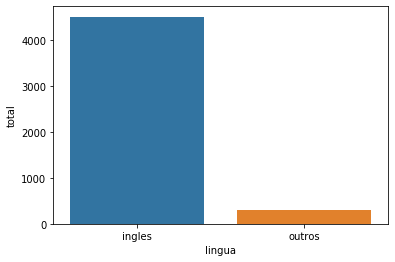

In [66]:
sns.barplot(x='lingua', y='total', data = dados)

- Após manipular os gráficos e plotar novamente o gráfico de barras foi possível passar a mensagem de que a maior quantidade dos filmes é em inglÊs.

**Analisando o grupo outros**

In [74]:
total_lingua_outros = tmdb.query("original_language != 'en'").original_language.value_counts()

In [71]:
#Filtando os filmes que NÃO são em inglês
filmes_lingua_outros = tmdb.query("original_language != 'en'")

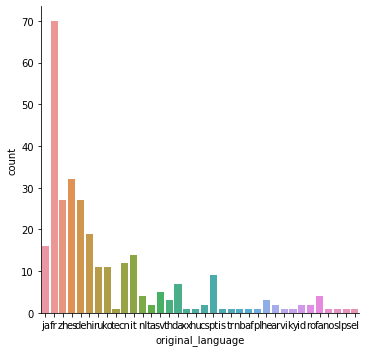

In [72]:
sns.catplot(x="original_language", kind="count", data=filmes_lingua_outros)

# Aula 5 - Refinando visualizações

Como o gráfico anteior tem muita categória, elas estão muito apertadas. Uma solução seria aumentar a largura do gráfico.

**Antes**

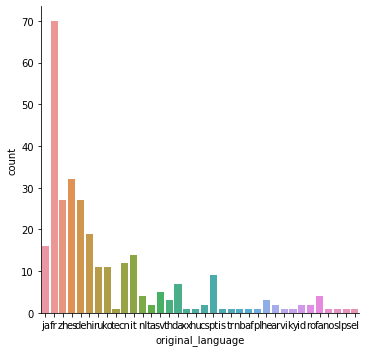

In [78]:
sns.catplot(x="original_language",
            kind="count",
            data=filmes_lingua_outros)

**Depois**

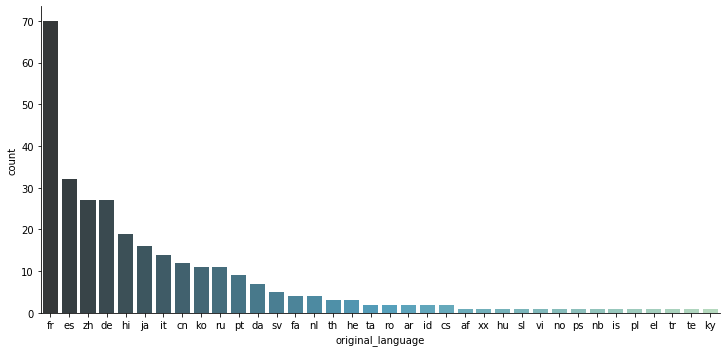

In [77]:
sns.catplot(x="original_language",
            kind="count",
            data=filmes_lingua_outros,
            aspect = 2,
            order = total_lingua_outros.index,
            palette = 'GnBu_d')

- Alguns modelos de gráfico do seaborn permitem usar o figsize do plt. Mas o catplot tem seus proprios parametros para configurar os plots.
- Nessa caso, para alterar a largura é só usar **aspect**.
- Para ordenar os dados utiliza-se **order**. A regra que utilizei foi o index do df que conta os valores por lingua.
- Mudar a paleta de cores para acompanhar o decrescimento dos valores = **palette = 'GnBu_d'**. Tem outras cores, só pesquisar no seaborn.

# Aula 6 - Dados e estatística

Média, mediana, desvio padrão, boxplot, histograma, tendência central e dispersão, como tudo isso se encaixa

In [79]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [80]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [85]:
notas_do_toy_story = notas.query("filmeId==1")
notas_do_jumanji = notas.query("filmeId==2")
#notas por filme
print(len(notas_do_toy_story),len(notas_do_jumanji))

215 110


**Média**

A média é a média dos dados, que é a soma de todas as observações divididas pelo número de observações.

Use a média para descrever a amostra com um único valor que representa o centro dos dados. Diversas análises estatísticas usam a média como uma média padrão do centro da distribuição dos dados.

In [86]:
print("Nota Média do Toy Story %.2f" %notas_do_toy_story.nota.mean())
print("Nota Média do Jumanji %.2f" %notas_do_jumanji.nota.mean())

Nota Média do Toy Story 3.92
Nota Média do Jumanji 3.43


**Mediana**

A mediana é o ponto médio do conjunto de dados. Este valor do ponto médio é o ponto em que metade das observações estão acima do valor e metade das observações estão abaixo do valor.

A mediana e a média medem a tendência central. Mas os valores atípicos, chamados de outliers, podem afetar a mediana menos do que afetam a média. Se seus dados forem simétricos, a média e a mediana são semelhantes.

In [87]:
print("Nota Mediana do Toy Story %.2f" %notas_do_toy_story.nota.median())
print("Nota Mediana do Jumanji %.2f" %notas_do_jumanji.nota.median())

Nota Mediana do Toy Story 4.00
Nota Mediana do Jumanji 3.50


As medidas como média, mediana e moda são medidas que tentam ver para onde está o comportamento central do dados. Ambas tentam definir toda a distribuição dos dados em um único ponto.

**Exemplo**

In [99]:
import numpy as np

a = np.array([2.5] * 10)
print("a = ", a)
b = np.array([3.5] * 10)
print("b = ", b)

filme1 = np.append(a,b)
print("filme 1 = ", filme1)
print("média",filme1.mean())
print("mediana", np.median(filme1))

a =  [2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5]
b =  [3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5]
filme 1 =  [2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5
 3.5 3.5]
média 3.0
mediana 3.0


In [100]:
c = np.array([5] * 10)
print("a = ", a)
d = np.array([1] * 10)
print("b = ", b)

filme2 = np.append(c,d)
print("filme 2 = ", filme2)
print("média", filme2.mean())
print("mediana", np.median(filme2))

a =  [2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5]
b =  [3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5]
filme 2 =  [5 5 5 5 5 5 5 5 5 5 1 1 1 1 1 1 1 1 1 1]
média 3.0
mediana 3.0


Ambos tem a mesma média r mediana, apesar de terem valores internos completamente diferentes. 
Quando você se concentra demais na média, perde informações sobre a distribuição dos dados.


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

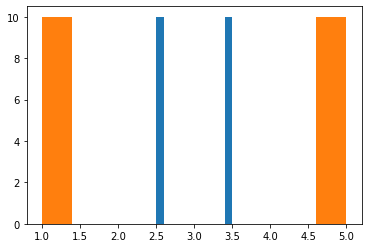

In [101]:
plt.hist(filme1)
plt.hist(filme2)

{'whiskers': [<matplotlib.lines.Line2D at 0x166cac30b08>,
 'caps': [<matplotlib.lines.Line2D at 0x166cac30c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x166cac30308>,
 'medians': [<matplotlib.lines.Line2D at 0x166cac34f48>,
 'fliers': [<matplotlib.lines.Line2D at 0x166cac34c88>,
 'means': []}

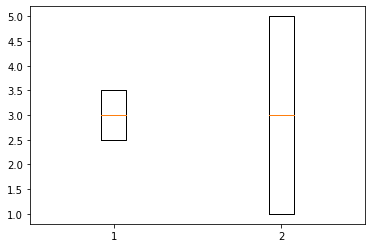

In [103]:
plt.boxplot([filme1, filme2])

**Voltando aos filmes**

{'whiskers': [<matplotlib.lines.Line2D at 0x166cae4be88>,
 'caps': [<matplotlib.lines.Line2D at 0x166cae4e9c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x166cae4b788>,
 'medians': [<matplotlib.lines.Line2D at 0x166cae4eb48>,
 'fliers': [<matplotlib.lines.Line2D at 0x166cae2ad88>,
 'means': []}

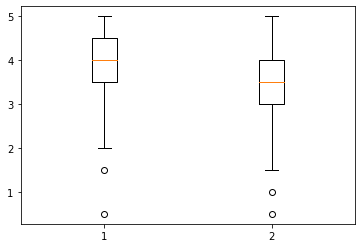

In [105]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

O diferencial do seaborn é que ele explora os dados e plota ao mesmo tempo. Necessitando de algumas ou nenhuma manipulação prévia. 

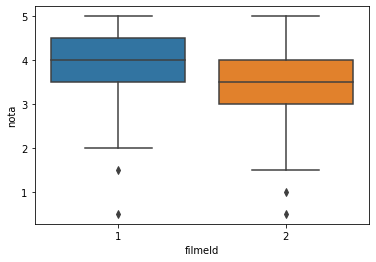

In [106]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in [1,2]"))

**Desvio Padrão**

O desvio padrão é a medida mais comum de dispersão, ou o quanto os dados estão dispersos sobre a média. O símbolo σ (sigma) é frequentemente usado para representar o desvio padrão de uma população, enquanto s é usado para representar o desvio padrão de uma amostra. 

Use o desvio padrão para determinar o grau de dispersão dos dados a partir da média. Um valor de desvio padrão mais alto indica maior dispersão nos dados.

In [108]:
print("Desvio padrão das notas do filme Jumanji", notas_do_jumanji.nota.std())
print("Desvio padrão das notas do filme Toy Story",notas_do_toy_story.nota.std())

Desvio padrão das notas do filme Jumanji 0.8817134921476455
Desvio padrão das notas do filme Toy Story 0.8348591407114045
